<a href="https://colab.research.google.com/github/carlo-coding/curso_deep_learning/blob/main/Curso_Deep_Learning_Clasificaci%C3%B3n_multiclase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Pasos a seguir
1.   Descargar los datos
2.   Conocer los datos.
3.   Normalizar los datos.
4.   Crear el modelo de ML
5.   Entrenar el modelo.
6.   Evaluar el modelo.



In [ ]:
from tensorflow import keras

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


x_train (60000, 28, 28)
y_train (60000,)
x_test (10000, 28, 28)
y_test (10000,)
5


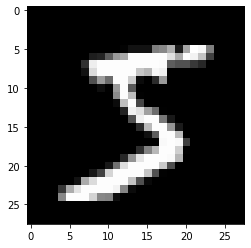

In [ ]:
import matplotlib.pyplot as plt


print("x_train", x_train.shape)
print("y_train", y_train.shape)
print("x_test", x_test.shape)
print("y_test", y_test.shape)
# 0 - 255
print(y_train[0])
plt.imshow(x_train[0], cmap="gray")
plt.show()

In [ ]:
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

model = Sequential()

model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(24, activation="relu"))
model.add(Dense(24, activation="relu"))
model.add(Dense(24, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="sgd",
    metrics=["acc"]
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 24)                18840     
                                                                 
 dense_5 (Dense)             (None, 24)                600       
                                                                 
 dense_6 (Dense)             (None, 24)                600       
                                                                 
 dense_7 (Dense)             (None, 10)                250       
                                                                 
Total params: 20,290
Trainable params: 20,290
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import numpy as np

np.sum(model.predict(x_train[0, None]))

1.0000001

In [ ]:
hist = model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8612 - acc: 0.7332
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3300 - acc: 0.9053
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2709 - acc: 0.9216
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2388 - acc: 0.9304
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2153 - acc: 0.9371
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1973 - acc: 0.9426
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1821 - acc: 0.9467
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1703 - acc: 0.9498
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1595 - acc: 0.9528
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1510 - acc: 0.9551


In [ ]:
loss, acc =  model.evaluate(x_test, y_test)

print("Precisión del modelo: {:.2f}".format(acc*100))

313/313 [==============================] - 1s 2ms/step - loss: 0.1606 - acc: 0.9518
Precisión del modelo: 95.18


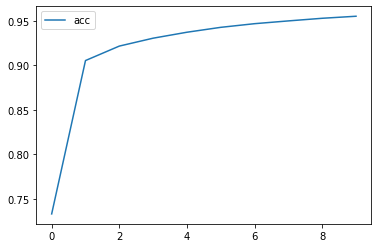

In [ ]:
plt.plot(range(len(hist.history["acc"])), hist.history["acc"], label="acc")
plt.legend()
plt.show()